In [1]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,  mean_squared_error, f1_score, roc_auc_score

from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

##### Data loading and Preparation

In [2]:
train_df = pd.read_csv("Train.csv")

In [3]:
train_df.shape

(7736, 21)

In [4]:
train_df.head()

,ID,gender,age,race,dwelling,dwelling_type,province_code,metro_code,psu,nationality,...,marital_st,Lang_inside,Lang_outside,Education,lw_work,lw_business,help_on_household,job_or_business,nature_of_work,target
0,ID_78668523,Female,31,Coloured,Dwelling/house or brick/concrete block structu...,Formal,Eastern Cape,EC - Non Metro,26610062,South Africa,...,Living together like husband and wife,Afrikaans,IsiXhosa,Grade 11/Standard 9/Form 4,Yes,No,No,Not applicable,Permanent,0
1,ID_50388203,Female,55,Black African,Dwelling/house or brick/concrete block structu...,Formal,Gauteng,GP - City of Tshwane,79911739,South Africa,...,Single and have never been married/never lived...,Sepedi,Sepedi,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable,0
2,ID_97213163,Female,38,Black African,Dwelling/house or brick/concrete block structu...,Formal,Western Cape,WC - City of Cape Town,19914297,South Africa,...,Married,IsiXhosa,English,Grade 12/Standard 10/Form 5/Matric (Exemption *),Yes,No,No,Not applicable,Permanent,1
3,ID_91277803,Female,65,Black African,Dwelling/house or brick/concrete block structu...,Formal,Eastern Cape,EC - Non Metro,28610220,South Africa,...,Single and have never been married/never lived...,IsiXhosa,IsiXhosa,Grade 3/Standard 1/AET 1 (Kha Ri Gude; Sanli),No,Yes,No,Not applicable,Temporary,0
4,ID_95933163,Female,72,Black African,Dwelling/house or brick/concrete block structu...,Formal,KwaZulu-Natal,KZN - Non Metro,56910035,South Africa,...,Widowed,IsiZulu,IsiZulu,Grade 4/Standard 2,No,No,No,No,Not applicable,0


In [5]:
train_df.columns

Index(['ID', 'gender', 'age', 'race', 'dwelling', 'dwelling_type',
       'province_code', 'metro_code', 'psu', 'nationality', 'RTH',
       'marital_st', 'Lang_inside', 'Lang_outside', 'Education', 'lw_work',
       'lw_business', 'help_on_household', 'job_or_business', 'nature_of_work',
       'target'],
      dtype='object')

#### Data Visualisation

/Users/michaelmbugua/.virtualenvs/zindi/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

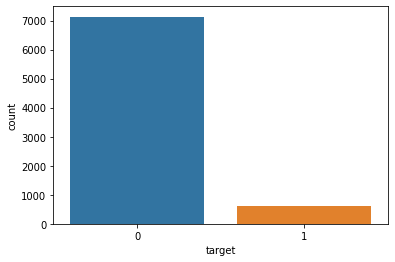

In [6]:
sns.countplot(train_df["target"])

- Try to create more visualisation from the other columns, what is the level of education of individual in the dataset.
- What about coorelation of other columns to the target.

##### Handling Categorical columns
- There are various way of encoding categorical columns. In the case below we're using label encoding 
<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html>.
- Find out other ways of encoding categorical columns, like one hot encoding - which one works better on this case.

In [7]:
train_df['gender'] = label.fit_transform(train_df['gender'])
train_df['race'] = label.fit_transform(train_df['race'])
train_df['dwelling'] = label.fit_transform(train_df['dwelling'])
train_df['dwelling_type'] = label.fit_transform(train_df['dwelling_type'])
train_df['province_code'] = label.fit_transform(train_df['province_code'])
train_df['metro_code'] = label.fit_transform(train_df['metro_code'])
train_df['nationality'] = label.fit_transform(train_df['nationality'])
train_df['RTH'] = label.fit_transform(train_df['RTH'])
train_df['marital_st'] = label.fit_transform(train_df['marital_st'])
train_df['Lang_inside'] = label.fit_transform(train_df['Lang_inside'])
train_df['Lang_outside'] = label.fit_transform(train_df['Lang_outside'])
train_df['Education'] = label.fit_transform(train_df['Education'])
train_df['lw_work'] = label.fit_transform(train_df['lw_work'])
train_df['lw_business'] = label.fit_transform(train_df['lw_business'])
train_df['help_on_household'] = label.fit_transform(train_df['help_on_household'])
train_df['job_or_business'] = label.fit_transform(train_df['job_or_business'])
train_df['nature_of_work'] = label.fit_transform(train_df['nature_of_work'])



In [8]:
train_df.head()

,ID,gender,age,race,dwelling,dwelling_type,province_code,metro_code,psu,nationality,...,marital_st,Lang_inside,Lang_outside,Education,lw_work,lw_business,help_on_household,job_or_business,nature_of_work,target
0,ID_78668523,0,31,1,2,0,0,2,26610062,1,...,1,0,3,9,3,1,1,2,4,0
1,ID_50388203,0,55,0,2,0,2,6,79911739,1,...,4,7,7,11,1,1,1,1,3,0
2,ID_97213163,0,38,0,2,0,8,15,19914297,1,...,2,3,1,10,3,1,1,2,4,1
3,ID_91277803,0,65,0,2,0,0,2,28610220,1,...,4,3,3,13,1,3,1,2,6,0
4,ID_95933163,0,72,0,2,0,3,9,56910035,1,...,7,4,4,14,1,1,1,1,3,0


In [9]:
train_df.RTH.unique()

array([5, 4, 8, 0, 7, 2, 1, 6, 3, 9])

In [10]:
train_df.psu.max()

98710543

##### Spliting the data
- It's always advisable to set aside some data for validating how your model performs. They are various methods of cross validation. In this case we use train-test split module from sklearn.

- Try other methods of cross-validation, Kfold, Stratified Fold, etc.

In [11]:
train_df.age.max()

102

In [12]:
# spliting the data, 70% train set and 30% val set
train_set, val_set = train_test_split(train_df,
                               test_size=0.30, random_state=2)

In [13]:
train_set.shape

(5415, 21)

In [14]:
val_set.shape

(2321, 21)

In [15]:
X_train_set = train_set.drop(["target", "ID"], axis=1) # feature columns
y_train_set = train_set["target"] # the label/target column

##### Model
- Create a binary classifier model for training purposes.
- Using simple RandomForest Classifier

In [16]:
cls = RandomForestClassifier()
cls.fit(X_train_set, y_train_set)

RandomForestClassifier()

In [17]:
# export to 
import sklearn.externals
import joblib

joblib.dump(cls, 'model.joblib')

['model.joblib']

###### 1. validation set
- let's see how our classifier performs on the validation dataset

In [18]:
X_val_set = val_set.drop(["target", "ID"], axis=1)
y_val_set = val_set["target"]

In [19]:
y_pred = cls.predict(X_val_set)

###### 2. Error metric
 - f1 score is the error metric for this competition.
 - **f1 score** -  

In [20]:
f1_score(y_val_set, y_pred)

0.02941176470588235

-We have an **f1 score of 0.0294**. Think of other ways to improve the scores like;
         
  - generate more features
  - drop the column that are least important, like gender in this case since we're only dealing with female crime data
  - try different classifier models, e.g k-Nearest Neighbor(KNN) classifier, Support Vector Machines, catboost classifier etc

#### Submission

- generating a sumission file 

###### 1. load the test data

- Do the same preprocessing performed on the training data

In [21]:
test_df = pd.read_csv("Test.csv")

# preprocessing
test_df['gender'] = label.fit_transform(test_df['gender'])
test_df['race'] = label.fit_transform(test_df['race'])

# preprocess all the othe columns as well
test_df['dwelling'] = label.fit_transform(test_df['dwelling'])
test_df['dwelling_type'] = label.fit_transform(test_df['dwelling_type'])
test_df['province_code'] = label.fit_transform(test_df['province_code'])
test_df['metro_code'] = label.fit_transform(test_df['metro_code'])
test_df['nationality'] = label.fit_transform(test_df['nationality'])
test_df['RTH'] = label.fit_transform(test_df['RTH'])
test_df['marital_st'] = label.fit_transform(test_df['marital_st'])
test_df['Lang_inside'] = label.fit_transform(test_df['Lang_inside'])
test_df['Lang_outside'] = label.fit_transform(test_df['Lang_outside'])
test_df['Education'] = label.fit_transform(test_df['Education'])
test_df['lw_work'] = label.fit_transform(test_df['lw_work'])
test_df['lw_business'] = label.fit_transform(test_df['lw_business'])
test_df['help_on_household'] = label.fit_transform(test_df['help_on_household'])
test_df['job_or_business'] = label.fit_transform(test_df['job_or_business'])
test_df['nature_of_work'] = label.fit_transform(test_df['nature_of_work'])

In [22]:
test_df.head()

,ID,gender,age,race,dwelling,dwelling_type,province_code,metro_code,psu,nationality,RTH,marital_st,Lang_inside,Lang_outside,Education,lw_work,lw_business,help_on_household,job_or_business,nature_of_work
0,ID_59989483,0,29,0,1,0,5,12,87410415,1,5,4,11,12,11,1,0,0,0,3
1,ID_87817963,0,67,3,1,0,5,12,86310049,1,4,2,1,1,4,1,0,0,0,3
2,ID_36181483,0,73,0,1,0,4,11,98410192,1,4,7,6,7,32,1,0,0,0,3
3,ID_49053163,0,58,0,1,0,4,11,98210128,1,4,0,6,7,19,3,0,0,1,4
4,ID_08894443,0,60,0,5,1,3,10,59912750,1,4,4,4,4,16,3,0,0,1,1


In [23]:
### predict on the test data
test_ = test_df.drop(["ID"], axis=1)
test_predictions = cls.predict(test_)
submission_df = pd.DataFrame()
submission_df["ID"] = test_df["ID"]
submission_df["target"] = test_predictions
# file
submission_df.to_csv("submission.csv", index=False)